In [2]:
import pandas as pd
import csv
import os

In [4]:
year_from = 2017
year_to = 2019

df_transfers = pd.read_csv('resources/transfers_clean.csv')
df_buyer = pd.read_csv('resources/buyer_club_nodes.csv')
df_seller = pd.read_csv('resources/seller_club_nodes.csv')

# Filter transfers depending on input
df_transfers = df_transfers[(df_transfers['year'] >= year_from) & (df_transfers['year'] <= year_to)]

# Generate edge list (freq)
df_freq_net = df_transfers[['club_name', 'club_involved_name']].reset_index()
df_freq_net = df_freq_net.groupby(['club_name', 'club_involved_name']).index.count().reset_index()
df_freq_net = pd.merge(df_freq_net, df_buyer, how='inner', on='club_name')
df_freq_net = pd.merge(df_freq_net, df_seller, how='inner', on='club_involved_name')
df_freq_net.rename(columns={'node_x': 'buyer', 'node_y': 'seller', 'index': 'weight'}, inplace=True)

In [5]:
clubs_idx = df_freq_net['buyer'].append(df_freq_net['seller'])
clubs_idx = clubs_idx.unique()
clubs_idx.sort()

In [8]:
filename = 'test.net'
df = df_freq_net

clubs_idx = df['buyer'].append(df['seller'])
clubs_idx = clubs_idx.unique()
clubs_idx.sort()

with open(filename, 'w') as outf:

    print('*Vertices\t{}'.format(clubs_idx.size), file=outf)
    vert_dict = {}
    for i, c in enumerate(clubs_idx):
        if c <= 331:
            club_name = df_buyer.iloc[c-1]['club_name']         
        else:
            club_name = df_seller.iloc[c-332]['club_involved_name']+'_seller'
        vert_dict[c] = i+1
        print('\t{} "{}"'.format(i+1, club_name), file=outf)     

    print('*Edges', file=outf)
    for i in range(df.shape[0]):
        buyer  = vert_dict[df['buyer'].iloc[i]]
        seller = vert_dict[df['seller'].iloc[i]]
        weight = df['weight'].iloc[i]
        print('\t{}\t{}\t{}'.format(buyer, seller, float(weight)), file=outf)

In [2]:
from igraph import Graph
import igraph as ig

In [4]:
g = Graph.Load('nets/2012-2013/freq_net.net')

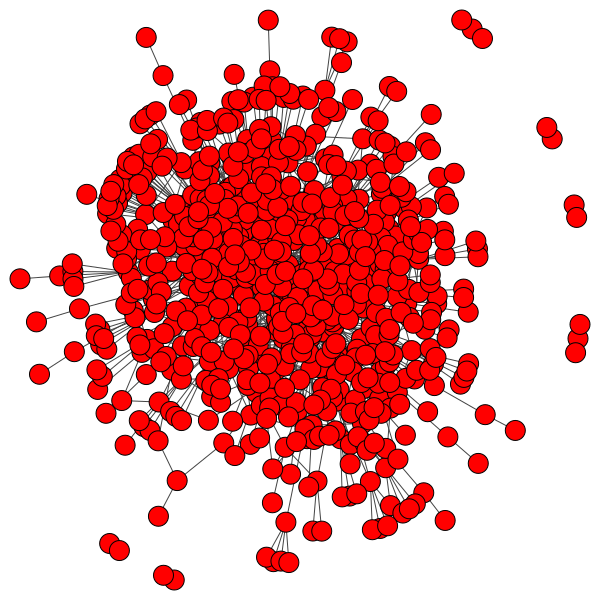

In [5]:
ig.plot(g)